# Simple Dense Neural Network
This is a full end-to-end experiment for classifying sounds as speech vs. no speech. See the other notebooks/scripts for data preprocessing. In summary, the raw audio files were converted into Mel Spectrograms. These Mel Spectrograms are what is to be fed into the neural network. In this experiment, a simple shallow dense neural network is used. 
Also, a prediction function is implemented and utilized in this notebook. 

## Load in Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pickle

# load in labels and samples for the training subset
training_samples_file = open('/content/drive/MyDrive/Mignot Lab Research/Experiments/one_sample/raw_data/training_samples.pkl', 'rb')
training_labels_file = open('/content/drive/MyDrive/Mignot Lab Research/Experiments/one_sample/raw_data/training_labels.pkl', 'rb')

# load in labels and samples for the test subset
test_samples_file = open('/content/drive/MyDrive/Mignot Lab Research/Experiments/one_sample/raw_data/test_samples.pkl', 'rb')
test_labels_file = open('/content/drive/MyDrive/Mignot Lab Research/Experiments/one_sample/raw_data/test_labels.pkl', 'rb')

In [4]:
# training
X = pickle.load(training_samples_file)
y = pickle.load(training_labels_file)

# test
test_samples = pickle.load(test_samples_file)
test_labels = pickle.load(test_labels_file)

In [5]:
# convert X to Numpy array since I forgot to in training data preprocessing 
import numpy as np 
X = np.array(X)

In [7]:
counter = 0 # how many are speech. 
for elem in y:
  if elem == 1:
    counter += 1
print(counter)

300


In [8]:
X = X[:600]
y = y[:600]

In [9]:
len(X)

600

In [10]:
len(y)

600

## Build the Model

In [11]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(128, 431)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
]) # inspired by https://www.tensorflow.org/tutorials/keras/classification

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 55168)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               7061632   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 7,061,890
Trainable params: 7,061,890
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
history = model.fit(X, y, epochs=1000)

Epoch 1/1000
19/19 [==============================] - 0s 6ms/step - loss: 1.0353e-04 - accuracy: 1.0000
Epoch 2/1000
19/19 [==============================] - 0s 7ms/step - loss: 1.0224e-04 - accuracy: 1.0000
Epoch 3/1000
19/19 [==============================] - 0s 7ms/step - loss: 1.0089e-04 - accuracy: 1.0000
Epoch 4/1000
19/19 [==============================] - 0s 6ms/step - loss: 9.9698e-05 - accuracy: 1.0000
Epoch 5/1000
19/19 [==============================] - 0s 6ms/step - loss: 9.8416e-05 - accuracy: 1.0000
Epoch 6/1000
19/19 [==============================] - 0s 7ms/step - loss: 9.7128e-05 - accuracy: 1.0000
Epoch 7/1000
19/19 [==============================] - 0s 7ms/step - loss: 9.5923e-05 - accuracy: 1.0000
Epoch 8/1000
19/19 [==============================] - 0s 7ms/step - loss: 9.4817e-05 - accuracy: 1.0000
Epoch 9/1000
19/19 [==============================] - 0s 7ms/step - loss: 9.3521e-05 - accuracy: 1.0000
Epoch 10/1000
19/19 [==============================] - 0s 7ms/st

In [36]:
history_dict = history.history
print(history_dict.keys())
# to keep for later 
%store history_dict

dict_keys(['loss', 'accuracy'])
Stored 'history_dict' (dict)


#### Plot graphs

In [37]:
# imports 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

In [38]:
# function to plot training given history dictionary 
def plot_training(history_dict):
	"""
	Plots the training accuracy and loss graphs for a Keras model (validation graphs not included). 
	Parameters:
		- history_dict: a dictionary of "history" object from Keras 
	"""
	# plot training accuracy graph 
	plt.plot(history_dict['accuracy'])
	plt.title('Training Accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train'], loc='upper left')
	plt.show()

	# plot training loss graph 
	plt.plot(history_dict['loss'])
	plt.title('Training Loss')
	plt.ylabel('loss')
	plt.xlabel('epoch')
	plt.legend(['train'], loc='upper left')
	plt.show() 

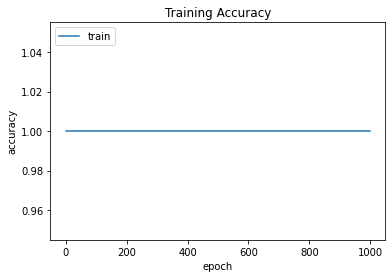

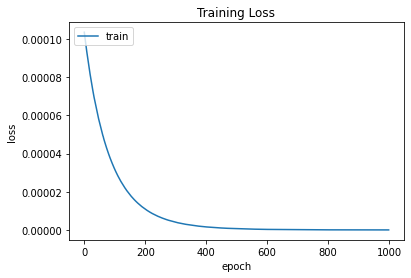

In [39]:
plot_training(history_dict)

Something to notice: big spike between epochs 25 and 50. 

## Evaluate on Test Set

In [40]:
test_loss, test_accuracy = model.evaluate(test_samples,  test_labels, verbose=2)
print('Test accuracy:', test_accuracy)

11/11 - 0s - loss: 6.5880 - accuracy: 0.9356
Test accuracy: 0.9355828166007996


**The** model's accuracy on the test set is **93.5%**

## Predictions

In [41]:
predictions = model.predict_classes(test_samples) # generates a list of predictions 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [42]:
print("Test labels: \n", test_labels)
print("Test predictions: \n", predictions)

Test labels: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Test predictions: 
 [1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 

In [43]:
correct = 0

In [44]:
for i in range(len(predictions)):
  if predictions[i] == test_labels[i]:
    correct += 1

In [45]:
predictions_accuracy = correct/len(test_labels)
predictions_accuracy

0.9355828220858896

In [46]:
print("The accuracy is: " + str(round(predictions_accuracy * 100, 1)) + "%")

The accuracy is: 93.6%


Accuracy on speech class: 

In [47]:
counter = 0 
for elem in test_labels:
  if elem == 1:
    counter += 1
print(counter)

33


In [48]:
speech_correct = 0
for i in range(len(test_labels[:33])):
    if predictions[i] == test_labels[i]:
      speech_correct += 1

In [49]:
speech_correct/len(test_labels[:33])

0.6666666666666666

#### Confusion matrix and other classification metrics

In [50]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

In [51]:
cm = confusion_matrix(test_labels, predictions)

In [52]:
def plot_cm(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astypea('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix without normalization')

  print(cm)

  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

Confusion matrix without normalization
[[283  10]
 [ 11  22]]


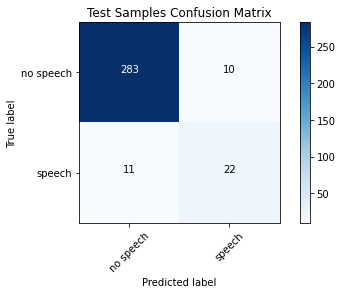

In [53]:
plot_cm(cm, ['no speech','speech'], title='Test Samples Confusion Matrix')

In [54]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, predictions, target_names=['no speech','speech']))

              precision    recall  f1-score   support

   no speech       0.96      0.97      0.96       293
      speech       0.69      0.67      0.68        33

    accuracy                           0.94       326
   macro avg       0.83      0.82      0.82       326
weighted avg       0.93      0.94      0.94       326

